# Solar Position Examples for pveducation.org
mainly uses the sun module

Do the normal imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
try:
    import photovoltaic as pv
except:
    print('attempting to install photovoltaic')
    !pip install photovoltaic
    import photovoltaic as pv


The solar position calculation uses on the pveducation site are approximations. More accurate calculations are in the python library pvlib (https://pvlib-python.readthedocs.io/en/stable/)

In [3]:
print('declination (degrees):',pv.sun.declination(1))
print('Equation of time (min): ', pv.sun.equation_of_time(1))
print('Time Correction (min): ', pv.sun.time_correction(-3.71,140, 10))
print('Elevation, Azimuth (degrees): ', pv.sun.elev_azi(-23.0116367279, -34, 13.27))
print('Sun Azimuth and Elevation (degrees)', pv.sun.sun_position(1, -34, 140, 10, 14, 0))
print('Sunrise, Sunset (hours)', pv.sun.sun_rise_set(-34, -23.0116367279, -43.71))
print('Direct light on a module (fraction)', pv.sun.module_direct(94.7078, 36.9758, 0, 45))

declination (degrees): -23.011636727869238
Equation of time (min):  -3.705178323396069
Time Correction (min):  -43.71
Elevation, Azimuth (degrees):  (70.03071775789097, 298.3977969528564)
Sun Azimuth and Elevation (degrees) (70.01342676739516, 298.35884675563125)
Sunrise, Sunset (hours) (5.618703268603117, 19.838296731396884)
Direct light on a module (fraction) 0.37894519514825864


# Comparision of Declination Angle Formula

There are a variety of formula for declination angle. They all give approximately the same results.

declination (degrees) at day 263
0.20183407703974532 0.3027464429589782 0.20183407703974995 0.8631938355317079


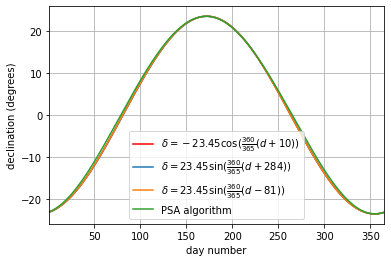

In [4]:
def declinationPSA(dayNo):
    '''converted from C++ code at www.psa.es/sdg/sunpos.htm Please check website for latest code'''
    dElapsedJulianDays = dayNo
    dOmega = 2.1429 - 0.0010394594 * dElapsedJulianDays
    dMeanLongitude = 4.8950630 + 0.017202791698 * dElapsedJulianDays  # Radians
    dMeanAnomaly = 6.2400600 + 0.0172019699 * dElapsedJulianDays
    dEclipticLongitude = dMeanLongitude + 0.03341607 * np.sin(dMeanAnomaly) + 0.00034894 * np.sin(
        2 * dMeanAnomaly) - 0.0001134 - 0.0000203 * np.sin(dOmega)
    dEclipticObliquity = 0.4090928 - 6.2140e-9 * dElapsedJulianDays + 0.0000396 * np.cos(dOmega)
    dSin_EclipticLongitude = np.sin(dEclipticLongitude)
    dDeclination = np.arcsin(np.sin(dEclipticObliquity) * dSin_EclipticLongitude)
    return (np.degrees(dDeclination))


dayNo = 263

dec1 = 23.45 * pv.sind(360 / 365 * (dayNo + 284))
dec2 = -23.45 * pv.cosd(360 / 365 * (dayNo + 10))
dec3 = 23.45 * pv.sind(360 / 365 * (dayNo - 81))
dec4 = declinationPSA(dayNo)

print('declination (degrees) at day ' + str(dayNo))
print(dec1, dec2, dec3, dec4)

dayNo = np.linspace(0, 365, 365)  # day number from 1 to 365

dec1 = 23.45 * pv.sind(360 / 365 * (dayNo + 284))
dec2 = -23.45 * pv.cosd(360 / 365 * (dayNo + 10))
dec3 = 23.45 * pv.sind(360 / 365 * (dayNo - 81))
dec4 = declinationPSA(dayNo)

plt.xlabel('day number')
plt.ylabel('declination (degrees)')
plt.xlim(1, 365)
plt.grid(True)
plt.plot(dayNo, dec1, label=r'$\delta=-23.45 \cos(\frac{360}{365}(d+10))$', color='r')
plt.plot(dayNo, dec2, label=r'$\delta=23.45 \sin(\frac{360}{365}(d+284))$')
plt.plot(dayNo, dec3, label=r'$\delta=23.45 \sin(\frac{360}{365}(d-81))$')
plt.plot(dayNo, dec4, label='PSA algorithm')
plt.legend(loc='lower center')
plt.savefig('plot_declination.png')
plt.show()


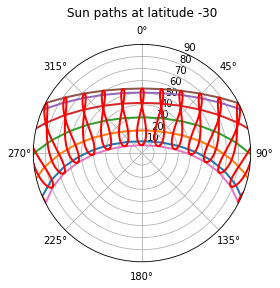

In [8]:
latitude = -30

day_nums=np.array([21, 52, 80, 111, 141, 172, 355])
days = np.linspace(1,365)
hours = np.arange(1.01,24)

longitude = 0
GMTOffset = 0
minute = 0

ax = plt.subplot(111, projection='polar')

for day in day_nums:
    alt, azi = pv.sun.sun_position(day,latitude,longitude,GMTOffset,hours,minute)
    ax.plot(np.radians(azi),90.0-alt, linewidth=2)

    
for hour in hours:
    alt, azi = pv.sun.sun_position(days,latitude,longitude,GMTOffset,hour,minute)
    ax.plot(np.radians(azi),90.0-alt, color='r', linewidth=2)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)
ax.grid(True)
ax.set_title("Sun paths at latitude "+str(latitude), va='bottom')
plt.show()

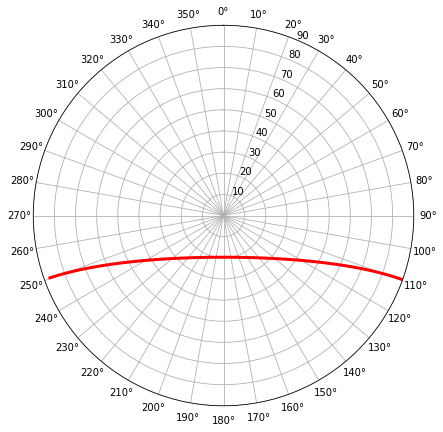

In [11]:
dayNo = 23
latitude = 0
longitude = 0
GMTOffset = 0
H = np.linspace(6, 18)
M = 0
elev, azi = pv.sun.sun_position(dayNo, latitude, longitude, GMTOffset, H, M)


r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='polar' )
ax.plot(np.radians(azi), (90.0 - elev), color='r', linewidth=3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(range(0,360,10))
ax.set_rmax(90)
ax.grid(True)

plt.show()